# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    city_url = f"{url}&q={city}"
    #print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | vorgashor
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | kapuskasing
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | iskateley
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | enewetak
Processing Record 13 of Set 1 | acapulco de juarez
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | luza
Processing Record 17 of Set 1 | kendari
Processing Record 18 of Set 1 | erseke
Processing Record 19 of Set 1 | alofi
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | snyder
Processing Record 23 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,67.59,76,91,16.87,PN,1690197234
1,puerto ayora,-0.7393,-90.3518,76.10,85,51,7.74,EC,1690197274
2,vorgashor,67.5833,63.9500,71.91,50,46,5.53,RU,1690197274
3,kodiak,57.7900,-152.4072,47.71,93,0,4.61,US,1690197274
4,port-aux-francais,-49.3500,70.2167,41.72,91,100,32.08,TF,1690197234


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,67.59,76,91,16.87,PN,1690197234
1,puerto ayora,-0.7393,-90.3518,76.10,85,51,7.74,EC,1690197274
2,vorgashor,67.5833,63.9500,71.91,50,46,5.53,RU,1690197274
3,kodiak,57.7900,-152.4072,47.71,93,0,4.61,US,1690197274
4,port-aux-francais,-49.3500,70.2167,41.72,91,100,32.08,TF,1690197234


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

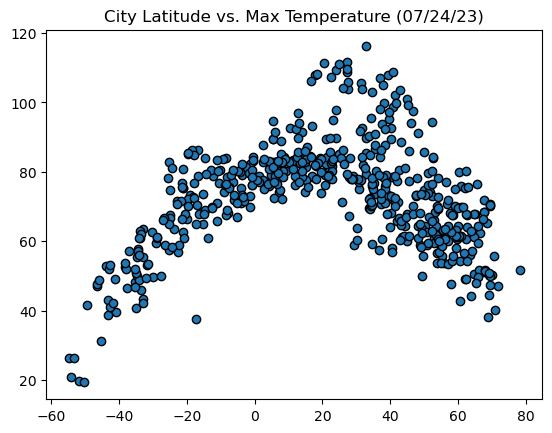

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = 'o', edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

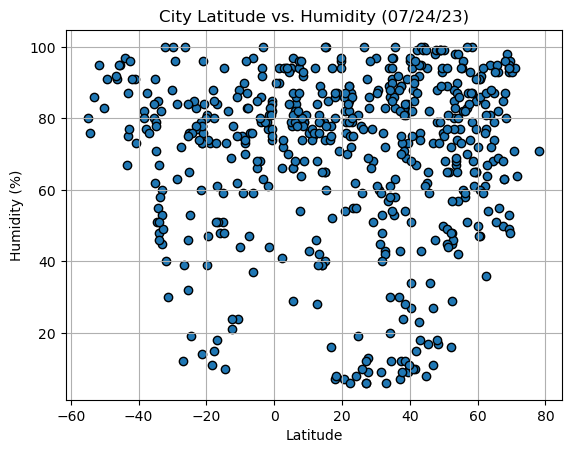

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = 'o', edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

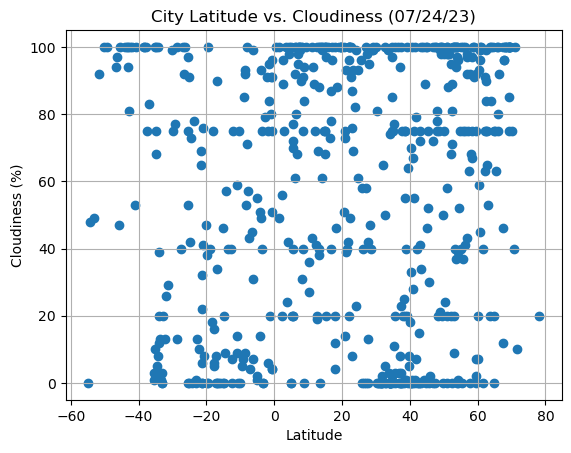

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt. grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

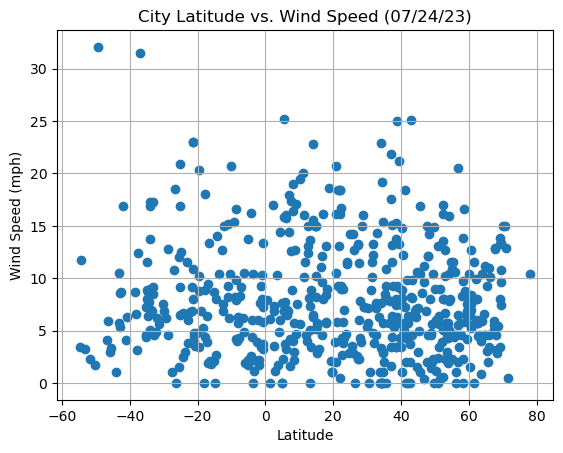

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o')


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-squared is: 0.013499757735673848


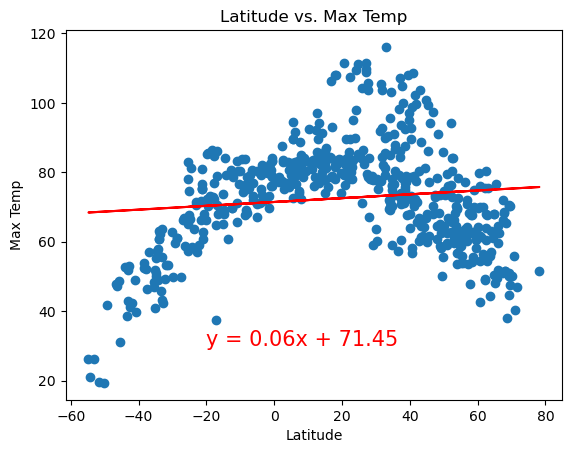

In [25]:
# Define a function to create Linear Regression plots
#####LAT VS. TEMP#####
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20, 30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.00012351480526362577


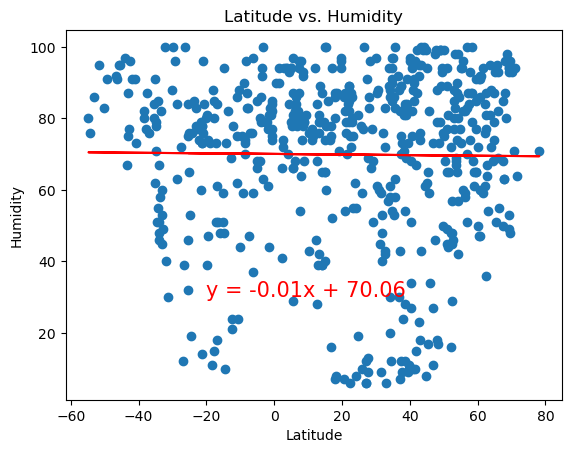

In [26]:
# Define a function to create Linear Regression plots
#####LAT VS. HUMIDITY#####
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.010127985059507419


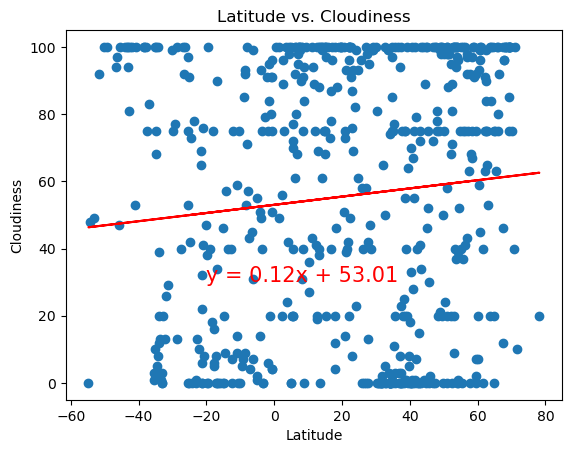

In [27]:
# Define a function to create Linear Regression plots
#####LAT VS. CLOUDINESS#####
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0060479364764627185


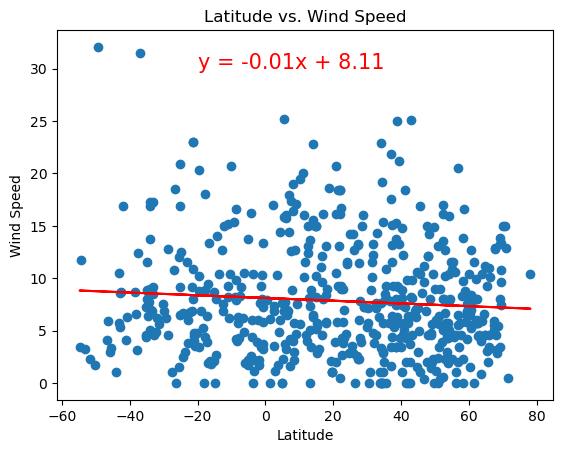

In [28]:
# Define a function to create Linear Regression plots
#####LAT VS. WIND SPEED#####
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,vorgashor,67.5833,63.9500,71.91,50,46,5.53,RU,1690197274
3,kodiak,57.7900,-152.4072,47.71,93,0,4.61,US,1690197274
5,kapuskasing,49.4169,-82.4331,50.09,93,20,2.30,CA,1690197274
8,iskateley,67.6803,53.1512,68.45,63,96,12.82,RU,1690197274
10,jamestown,42.0970,-79.2353,65.79,99,40,5.75,US,1690197220


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,67.59,76,91,16.87,PN,1690197234
1,puerto ayora,-0.7393,-90.3518,76.10,85,51,7.74,EC,1690197274
4,port-aux-francais,-49.3500,70.2167,41.72,91,100,32.08,TF,1690197234
6,invercargill,-46.4000,168.3500,47.23,91,97,5.91,NZ,1690197274
7,ushuaia,-54.8000,-68.3000,26.26,80,0,3.44,AR,1690197242


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.34638206900072965


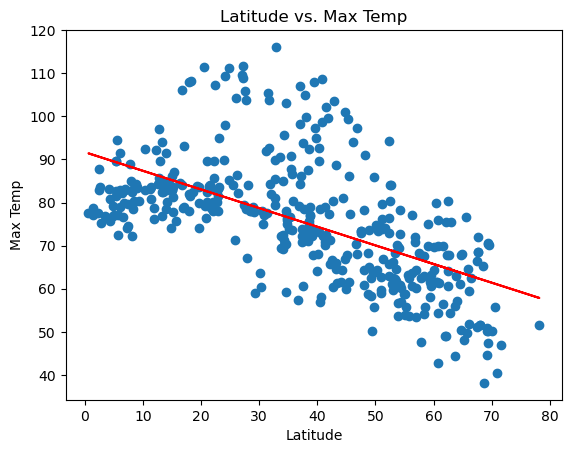

In [31]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.7038209915609097


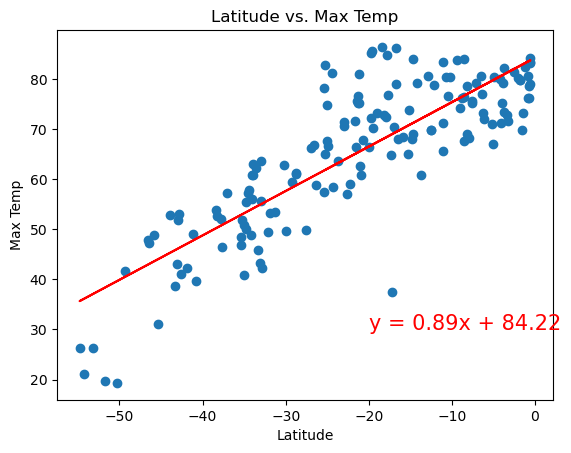

In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0005332388643182598


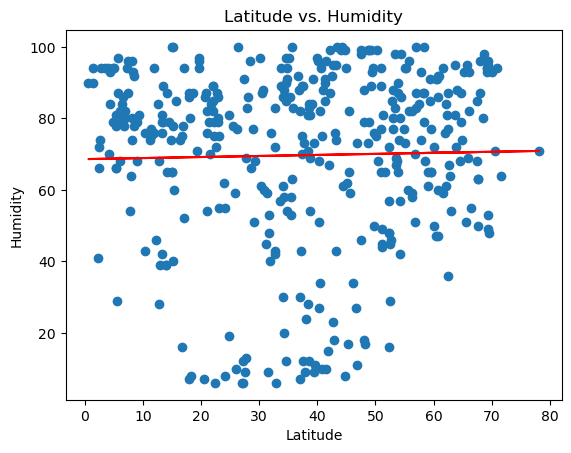

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.010415120844586259


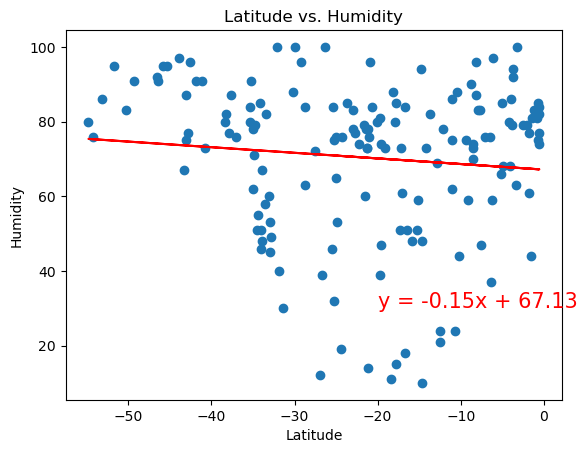

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 1.1844143974839052e-05


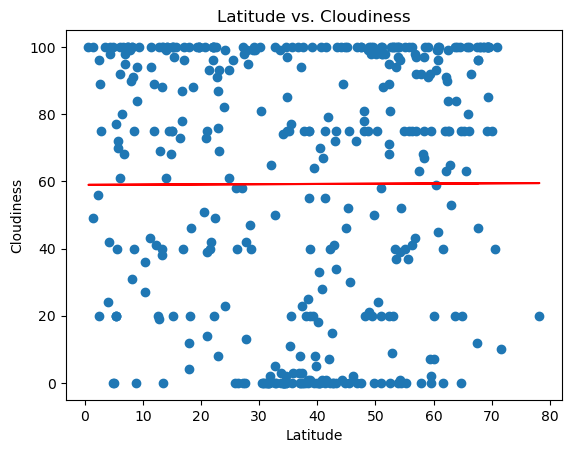

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.03928793661462996


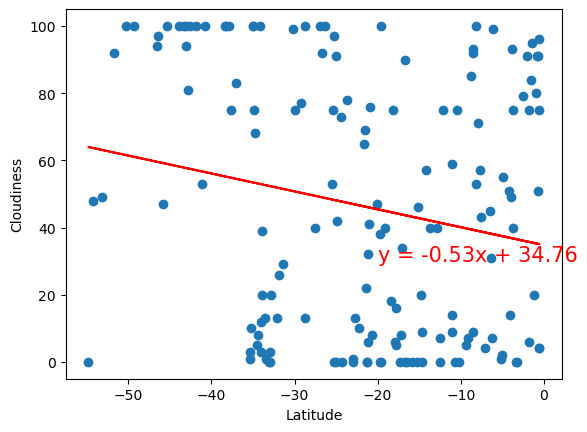

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.015927297721208964


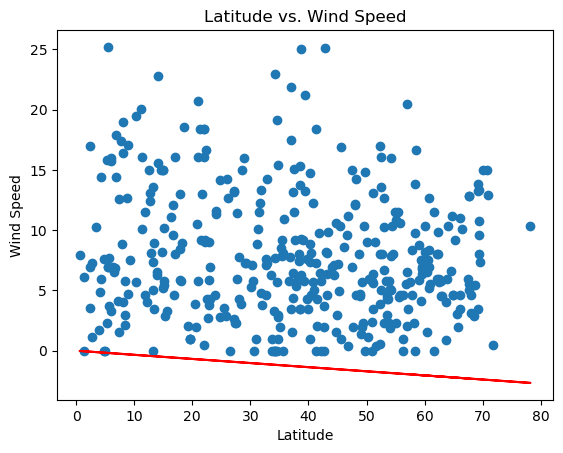

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color="red")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.007948326723322794


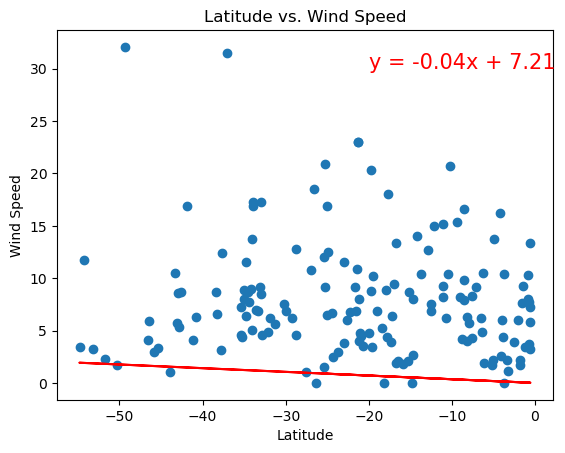

In [40]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color="red")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** the r-value suggests that there is a weak negative correlation between latitude and wind speed in the southern hemisphere